# A Simple Example
1. datasets: iris
2. classification model: DecisionTrees

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# prepare iris dataset
iris_ex = load_iris()
iris_ex.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris_ex["target_names"])
print(iris_ex["feature_names"])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [37]:
X_ex = iris_ex.data[:,2:] # petal length and width
y_ex = iris_ex.target

tree_ex_2_clf = DecisionTreeClassifier(max_depth=2)
tree_ex_2_clf.fit(X_ex, y_ex)
tree_ex_3_clf = DecisionTreeClassifier(max_depth=3)
tree_ex_3_clf.fit(X_ex, y_ex)
tree_ex_5_clf = DecisionTreeClassifier(max_depth=5)
tree_ex_5_clf.fit(X_ex, y_ex)
tree_ex_12_clf = DecisionTreeClassifier(max_depth=12)
tree_ex_12_clf.fit(X_ex, y_ex)

DecisionTreeClassifier(max_depth=12)

In [38]:
print(X_ex.max(axis=0))
print(X_ex.min(axis=0))

[6.9 2.5]
[1.  0.1]


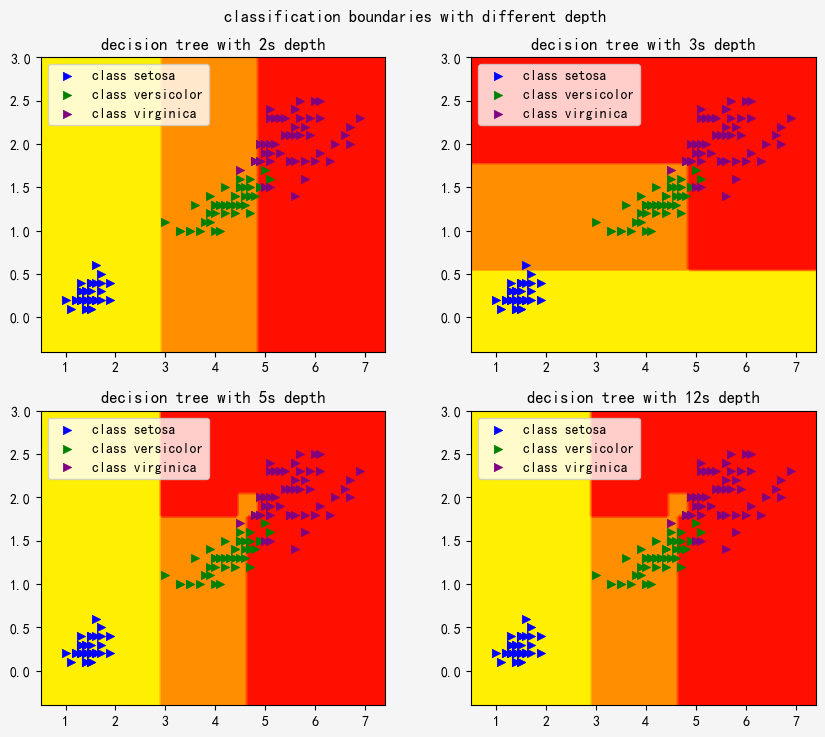

In [56]:
import matplotlib as mpl
import numpy as np
import copy
from matplotlib import pyplot as plt
from collections import Counter

%matplotlib inline

plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False

# prepare for display in different class
ids_collection = [[],[],[]]
for ids,(data,label) in enumerate(zip(X_ex,y_ex)):
    if label == 0:
        ids_collection[0].append(data)
    elif label == 1:
        ids_collection[1].append(data)
    else:
        ids_collection[2].append(data)    
ids_collection = np.array(ids_collection,dtype=np.float64)

# prepare for display of classification plane
X_mesh = np.linspace(X_ex.min(axis=0)[0]-0.5,X_ex.max(axis=0)[0]+0.5,100)
Y_mesh = np.linspace(X_ex.min(axis=0)[1]-0.5,X_ex.max(axis=0)[1]+0.5,100)
XX_mesh, YY_mesh = np.meshgrid(X_mesh, Y_mesh)
ZZ_mesh = np.zeros_like(XX_mesh)
ZZ_mesh_collection = [[],[],[],[]]

for ids,clf in enumerate([tree_ex_2_clf,tree_ex_3_clf,tree_ex_5_clf,tree_ex_12_clf]):
    # predict each point in meshgrid
    for idx in range(len(X_mesh)):
        for idy in range(len(Y_mesh)):
            ZZ_mesh[idx,idy] = clf.predict([[X_mesh[idx],Y_mesh[idy]]])
    ZZ_mesh_collection[ids] = ZZ_mesh
    ZZ_mesh = np.zeros_like(XX_mesh)

fig, ax = plt.subplots(2,2,figsize=(10,8),
                      facecolor="whitesmoke",
                      edgecolor="gray")
fig.suptitle("classification boundaries with different depth")
fig.subplots_adjust(top=0.92,hspace=0.20,wspace=0.25)
for ai,dep,ZZ in zip(ax.flat,[2,3,5,12], ZZ_mesh_collection):
    ai.contourf(XX_mesh,YY_mesh,ZZ,cmap=plt.cm.autumn_r)
    ai.scatter(ids_collection[0,:,0],ids_collection[0,:,1],marker='>',
               lw=.5,color='blue', label="class setosa")
    ai.scatter(ids_collection[1,:,0],ids_collection[1,:,1],marker='>',
               lw=.5,color='green', label="class versicolor")
    ai.scatter(ids_collection[2,:,0],ids_collection[2,:,1],marker='>',
               lw=.5,color='purple', label="class virginica")
    ai.legend(loc="best")
    ai.set_title("decision tree with " + str(dep) + "s depth")